# <span style="color:#3498db">**A mini-tutorial on the Statistical Assessment of Time Frequency Data**</span>

Recently I came across [an article](https://www.tandfonline.com/doi/full/10.1080/08989621.2021.1962713) that highlighted the replication crisis in biology. Why so often, the article stressed, results obtained by teams at different labs using the same data (and following the same inquiries) are difficult or even impossible to replicate reliably? According to the article, there is some agreement about what may be partly causing this replication crisis: in many cases statisticians act more like plumbers rather than like a priest. While I personally do not agree with the dogmatic view of priest-like statisticians imposing their hypothesis-making machinery to every problem they stumble upon, even if the nature of the problem lay beyond their field, I do agree on the need to reach some collective consensus, especially when the delicate decisions involving the statistical assessment of given problem may contribute with more confusion than clarity.

While good intentioned, the priest-like perspective should not turn into [*scientificism/scientism*](https://www.merriam-webster.com/dictionary/scientism), *or the urge to trust on the temporary answers our good old metrics provide more than the underlying problem that inspired them in first place*. Funnily, at the same time I was reading the article I came across another gem in ––now defunct–– Twitter. [A post](https://twitter.com/lakens/status/1718654122516156777) by [Daniël Lackens](https://twitter.com/lakens) provided the much needed, *so zu sagen*, plumber's perspective. After all, plumbing and fitting are delicate activities whose results can either resemble a pipe jungle or a professional design.

In this mini-tutorial, I show how two approaches, when applied to the same scenario, can lead to the same conclusions. I provide basic Python code to illustrate how two different but fundamentally similar pipelines can lead to slightly different but comparable results. The pipelines are based on examples provided in [Fieldtrip](https://www.fieldtriptoolbox.org/workshop/oslo2019/statistics/#permutation-test-with-cluster-correction) and adapted from the book [*Analyzing Neural Time Series Data: Theory and Practice*](https://direct.mit.edu/books/book/4013/Analyzing-Neural-Time-Series-DataTheory-and)

Specifically, to assess the statistical significance of spectral estimates obtained from electrophysiological data (i.e. LFP) we used non-parametric permutation tests and focused on the multiple comparison correction of time frequency representations (TFRs). The success of the two approaches depends on the dimensions of the data at hand, be these spatial locations, time and frequency analysis parameters, trials of different conditions, the nature of hypothesis, etc. For basic pedagogical purposes, here I focus on spectral power increases relative to baseline using two variants of the same method: 1) null hypothesis testing using the min-max distribution approach, which captures variations at the extremes of the null distribution, and 2) null hypothesis testing using the whole null distribution, obtained by averaging across specific dimensions. Since there are several ways to achieve these goals and many realizations of these and other related methods (i.e. thresholds may be obtained from the percentiles of the null distribution directly and further corrected in equivalent ways, or the pooling of data accomplished among specific dimensions), here I focus on two common methods using very simple examples in the hope to help those researchers (including myself) that are or may be in need of clarity on these matters, touch ground. Beware there may even be error to be spot or loops to optimize.

Depending on the approach, the computation of the p-values will change slightly. In the min-max approach the minimum and maximum values at each permutations are used. When testing using the whole null distribution, the null values obtained from the permutations are averaged the same way the empirical distribution is averaged so the dimensions of the empirical distributions are preserved in the null distribution. Once the null distributions have been obtained, p-values are obtained using the empirical cumulative distribution method.

Provided the right Python environment is installed and data, this Jupyter notebook should work as a simple mini-tutorial and support the discussion of these and related basic approaches for computing TFRs and assessing their statistical significance in a clear and easy to *understand/explain* way. The functions within this notebook are provided in an exploratory state and are subject to change. A background section with an open discussion subsection is included. Please feel free to use it help improve the codebook. The package can be downloaded from here: https://github.com/nicogravel/tfrStats

## Installation


To run the [notebook](https://github.com/nicogravel/tfrStats/blob/main/docs/html/notebooks/statistical_approach.ipynb), clone the package (or your fork) locally and then:
  
    
```
git clone https://github.com/nicogravel/tfrStats.git

cd tfrStats

conda env create --name tfrStats-dev --file tfrStats.yml

conda activate tfrStats-dev

pip install -e .
```
  
    
    

Voilà!

## Import libraries and define functions

In [1]:
from tfrStats.plot_tfr_stats import plot_tfr_stats as plot_tfr_stats
from tfrStats.plot_dtfr_stats import plot_dtfr_stats as plot_dtfr_stats


#in_path   = '/Volumes/.../data/'
#out_path  = '/Volumes/.../results/stats/univariate/'


in_path   = '/Volumes/Gandalg/MWlamprop/data/'
out_path  = '/Volumes/Gandalf/MWlamprop/results/stats/univariate/'

## Compute p-values

Here we plot TFRs with the significance threshold computed from p-values (i.e. p-val <= 0.05) (top panel, blue trace). The alpha mask specifies the section containing the values above the null percentile cutoff (i.e. 95%). The p-values (bottom panel) with the null percentile cutoff  (red trace)

### min-max

/Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (1000, 30, 12, 16, 2)
min-max
cutoff computed using min/max of null distribution:  75.96054268486813


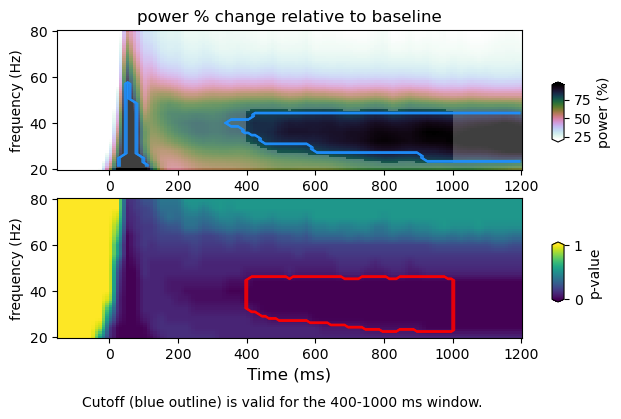

### whole-null

/Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_100.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (30, 12, 16, 113)
whole-null
cutoff computed using whole null distribution:  70.79162686024465


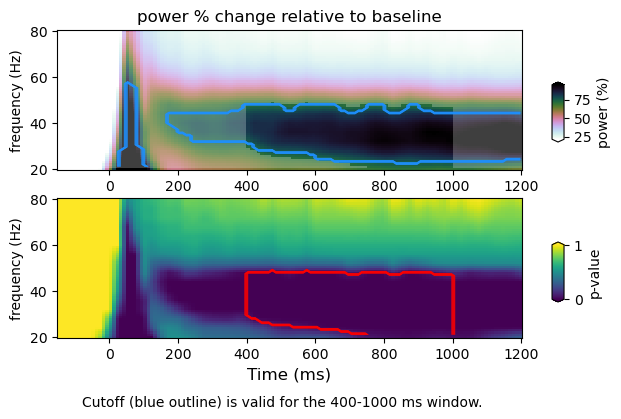

In [3]:
null         = [0, 95]
alpha        = 0.01
correction   = 1
cluster_size = 0
fband        = 1
cond         = 0
type         = 'whole'

plot_tfr_stats(out_path, cond, fband, null, correction, cluster_size, type, alpha)  

##  Spectral power as a function of depth and space

For this other type of TFR one must consider the pooling of data over predefined frequency bins, as well as spatial dimentions (i.e.  ROIs). Therefore, the multiple correction will change slightly. 

### min-max

/Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (1000, 30, 12, 16, 2)
peak frequency range :  28.0 44.0
power average within peak: 86.6390137791448
min-max
cutoff computed using min/max of null distribution:  70.91082666125475


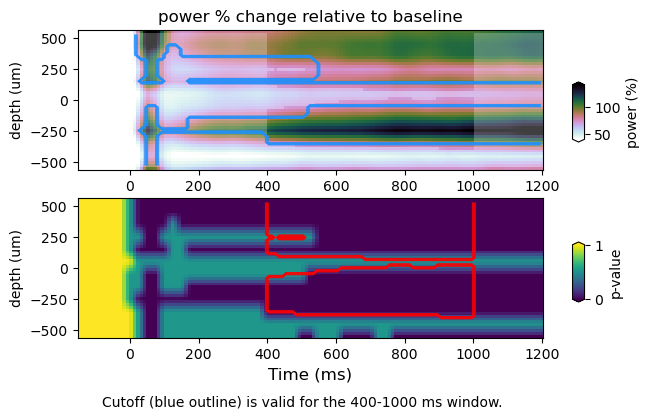

In [6]:
null         = [1, 95]
alpha        = 0.05
correction   = 1
cluster_size = 0
fband        = 1
cond         = 0
type         = 'minmax'

plot_dtfr_stats(out_path, cond, fband, null, correction, cluster_size, type, alpha)

###  whole null

/Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_100.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (30, 12, 16, 113)
peak frequency range :  28.0 44.0
power average within peak: 86.6390137791448
whole-null
cutoff computed using whole null distribution:  70.52901730660238


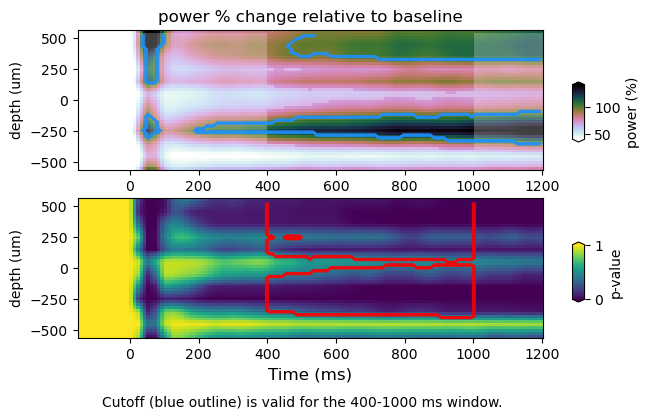

In [7]:
null         = [0, 95] 
alpha        = 0.05
correction   = 1
cluster_size = 0
fband        = 1
cond         = 0
type         = 'whole'

plot_dtfr_stats(out_path, cond, fband, null, correction, cluster_size, type, alpha)  